## Exercises, Part 2: `Random Forest`

1. Read the Scikit-learn documentation on random forests [(see here)](https://scikit-learn.org/stable/modules/tree.html).


2. Do the same steps that you followed for the decision tree, this time  using the random forest (in this case, add the n estimators  parameters to the mandatory parameters to test).


3. Compare the results of the random forest models with the decision  tree models that you tested.

4. `(Optional)` the Scikit-learn documentation on the other [ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html).

5. `(Optional)` Test other ensemble models on the same and/or other  datasets of your choice.


In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 1. Iris Dataset

In [3]:
iris_dataset = load_iris()

In [4]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df_iris = pd.DataFrame(iris_dataset.data, columns= iris_dataset.feature_names)
df_iris['target'] = iris_dataset.target_names[iris_dataset.target]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], random_state=0, test_size=0.2)

rfc = RandomForestClassifier().fit(X_train, y_train)

In [7]:
(rfc.predict(X_test) == y_test).sum() / X_test.shape[0]

1.0

In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [9]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

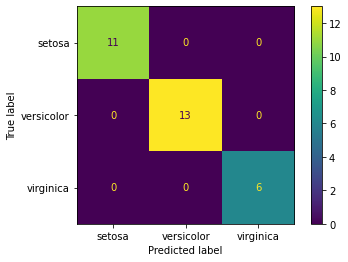

In [10]:
plot_confusion_matrix(rfc, X_test, y_test)

# 2. Car Dataset

In [13]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"


col_names = [
    "buying",
    "maint",
    "doors",
    "persons",
    "lug_boot",
    "safety",
    "class"
]

car_dict = {
    "buying":   ["vhigh", "high", "med", "low"],
    "maint":    ["vhigh", "high", "med", "low"],
    "doors":    ["2", "3", "4", "5more"],
    "persons":  ["2", "4", "more"],
    "lug_boot": ["small", "med", "big"],
    "safety":   ["low", "med", "high"],
    "class":    ["unacc", "acc", "good", "vgood"]
}

df_car = pd.read_csv(data_url, names= col_names, header=None)

def translate(dataframe, dictionary):
    trans_df = dataframe.copy()
    for idx in dataframe.index:
        for column in dataframe.columns:
            trans_df.xs(idx)[column] = dictionary.get(column).index(dataframe.xs(idx)[column])
    return trans_df
            


df_car


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [15]:
trans_df = translate(df_car, car_dict)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(trans_df.iloc[:, :-1], trans_df.iloc[:, -1], random_state=0, test_size=0.2)

y_train_int = y_train.astype('int')

rfc = RandomForestClassifier().fit(X_train, y_train_int)


In [36]:
(rfc.predict(X_test) == y_test).sum() / len(X_test)

0.9682080924855492

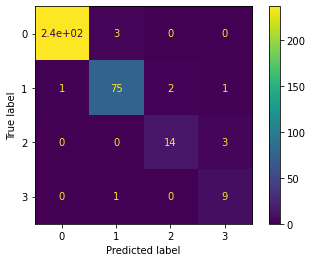

In [38]:
plot_confusion_matrix(rfc, X_test, y_test.astype('int'))